In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
cfar100 = tf.keras.datasets.cifar100
(x_train , y_train),(x_test , y_test) = cfar100.load_data()
x_train , x_test = x_train / 255.0 , x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(100, activation='softmax')
])

In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])


In [5]:
model_output = model.fit(x_train,y_train,epochs=25)
model.evaluate(x_test,y_test)

Epoch 1/25
1563/1563 [==============================] - 43s 26ms/step - loss: 3.8831 - accuracy: 0.1075
Epoch 2/25
1563/1563 [==============================] - 40s 25ms/step - loss: 3.2427 - accuracy: 0.2141
Epoch 3/25
1563/1563 [==============================] - 47s 30ms/step - loss: 2.9368 - accuracy: 0.2718
Epoch 4/25
1563/1563 [==============================] - 38s 24ms/step - loss: 2.7295 - accuracy: 0.3136
Epoch 5/25
1563/1563 [==============================] - 40s 26ms/step - loss: 2.5665 - accuracy: 0.3459
Epoch 6/25
1563/1563 [==============================] - 40s 25ms/step - loss: 2.4306 - accuracy: 0.3722
Epoch 7/25
1563/1563 [==============================] - 42s 27ms/step - loss: 2.3302 - accuracy: 0.3941
Epoch 8/25
1563/1563 [==============================] - 38s 24ms/step - loss: 2.2398 - accuracy: 0.4131
Epoch 9/25
1563/1563 [==============================] - 37s 24ms/step - loss: 2.1582 - accuracy: 0.4331
Epoch 10/25
1563/1563 [==============================] - 38s 24m

[3.2764430046081543, 0.3395000100135803]

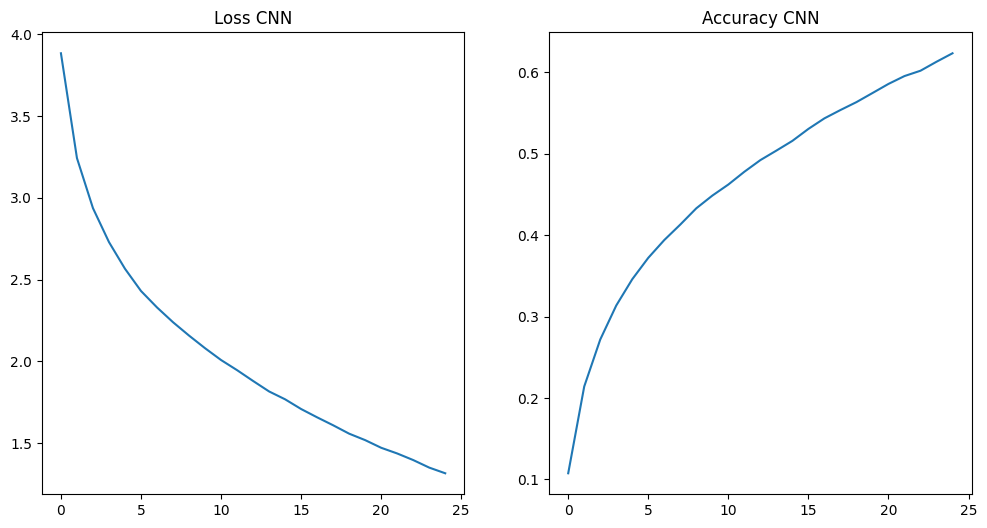

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(model_output.history['loss'])
ax1.set_title("Loss CNN")
ax2.plot(model_output.history['accuracy'])
ax2.set_title("Accuracy CNN")
plt.show()